# Sector Mappings

To generate sector allocation plots in the positions tearsheet and PnL by sector in the round trips tearsheet, you must pass pyfolio a dictionary (or dict-like data structure) of symbol-sector mappings, where symbols are keys and sectors are values. `create_full_tearsheet` will also take symbol-sector mappings as the keyword argument `sector_mappings`.

In this notebook, we generate the positions tear sheet and round-trip tear sheet with sector mappings.

## Imports & Settings

In [1]:
# silence warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pyfolio as pf
import pandas as pd
%matplotlib inline
import gzip
import os

## Load data

We use some test data for illustration:

In [3]:
returns = pd.read_csv(gzip.open('../tests/test_data/test_returns.csv.gz'),
                      index_col=0, parse_dates=True, header=None)[1]
positions = pd.read_csv(gzip.open('../tests/test_data/test_pos.csv.gz'),
                        index_col=0, parse_dates=True)
transactions = pd.read_csv(gzip.open('../tests/test_data/test_txn.csv.gz'),
                           index_col=0, parse_dates=True)

In [4]:
positions.head()

,AMD,CERN,COST,DELL,GPS,INTC,MMM,cash
index,,,,,,,,
2004-01-09 00:00:00+00:00,6961.92,21017.07875,7282.266152,21264.55188,7091.080020,21259.333890,21316.129606,-6192.360298
2004-01-12 00:00:00+00:00,18198.58,18071.25000,17675.836401,10804.31924,10685.411865,17872.477480,10882.026400,-3329.289887
2004-01-13 00:00:00+00:00,12060.86,11942.24625,12838.477446,16078.90380,16272.139000,12465.392511,12579.135758,4708.039735
2004-01-14 00:00:00+00:00,13102.40,15534.28125,14447.422640,15414.45080,15666.440185,14884.069620,13454.542620,-2749.470030
2004-01-15 00:00:00+00:00,15518.40,14547.05000,14164.039680,14407.48813,14926.122619,14422.385864,13929.159049,-2462.919316


## Add Sector Mappings

In [5]:
# define our sector mappings
sect_map = {'COST': 'Consumer Goods',
            'INTC': 'Technology', 
            'CERN': 'Healthcare', 
            'GPS': 'Technology',
            'MMM': 'Construction', 
            'DELL': 'Technology', 
            'AMD': 'Technology'}

## Run Position Tear Sheet

Top 10 long positions of all time,max
COST,90.01%
DELL,85.73%
CERN,83.53%
MMM,82.09%
INTC,78.59%
AMD,75.76%
GPS,62.24%


Top 10 short positions of all time,max
AMD,-30.12%
DELL,-26.58%
CERN,-25.51%
MMM,-22.62%
GPS,-20.09%
INTC,-18.47%
COST,-16.44%


Top 10 positions of all time,max
COST,90.01%
DELL,85.73%
CERN,83.53%
MMM,82.09%
INTC,78.59%
AMD,75.76%
GPS,62.24%


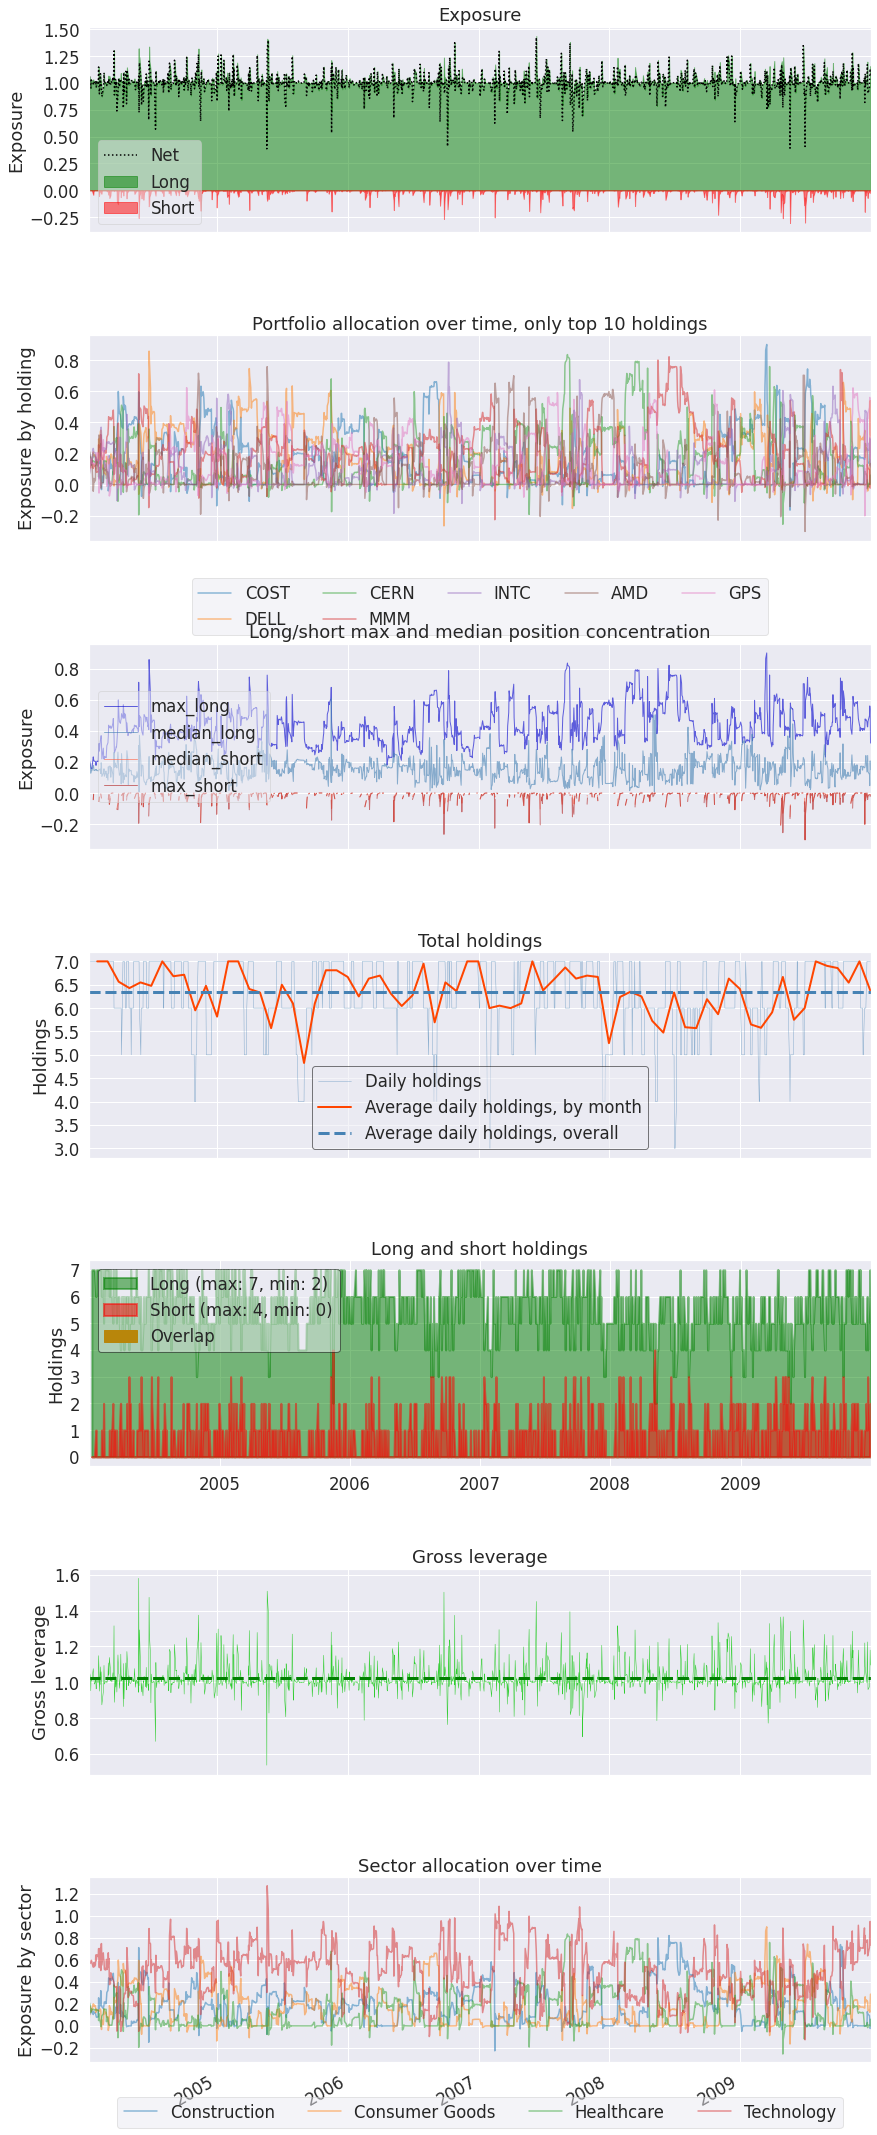

In [6]:
pf.create_position_tear_sheet(returns, positions, sector_mappings=sect_map)

Summary stats,All trades,Short trades,Long trades
Total number of round_trips,5822.00,1155.00,4667.00
Percent profitable,0.50,0.52,0.49
Winning round_trips,2886.00,595.00,2291.00
Losing round_trips,2917.00,553.00,2364.00
Even round_trips,19.00,7.00,12.00


PnL stats,All trades,Short trades,Long trades
Total profit,$65404.25,$3560.10,$61844.15
Gross profit,$448803.34,$20608.45,$428194.89
Gross loss,$-383399.09,$-17048.35,$-366350.75
Profit factor,$1.17,$1.21,$1.17
Avg. trade net profit,$11.23,$3.08,$13.25
Avg. winning trade,$155.51,$34.64,$186.90
Avg. losing trade,$-131.44,$-30.83,$-154.97
Ratio Avg. Win:Avg. Loss,$1.18,$1.12,$1.21
Largest winning trade,$9500.14,$1623.24,$9500.14
Largest losing trade,$-22902.83,$-661.29,$-22902.83


Duration stats,All trades,Short trades,Long trades
Avg duration,13 days 03:21:49.653555479,2 days 10:39:35.064935064,15 days 18:53:36.628026569
Median duration,8 days 00:00:00,2 days 00:00:00,12 days 00:00:00
Longest duration,84 days 00:00:00,13 days 00:00:00,84 days 00:00:00
Shortest duration,0 days 00:00:01,1 days 00:00:00,0 days 00:00:01


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.01%,0.01%,0.01%
Avg returns winning,0.13%,0.13%,0.12%
Avg returns losing,-0.11%,-0.12%,-0.11%
Median returns all round_trips,-0.00%,0.00%,-0.00%
Median returns winning,0.02%,0.02%,0.02%
Median returns losing,-0.01%,-0.01%,-0.01%
Largest winning trade,6.78%,6.78%,6.19%
Largest losing trade,-17.23%,-3.95%,-17.23%


Symbol stats,AMD,CERN,COST,DELL,GPS,INTC,MMM
Avg returns all round_trips,0.04%,-0.01%,-0.02%,0.02%,-0.02%,-0.04%,0.07%
Avg returns winning,0.13%,0.08%,0.09%,0.12%,0.12%,0.17%,0.16%
Avg returns losing,-0.07%,-0.08%,-0.10%,-0.08%,-0.18%,-0.21%,-0.05%
Median returns all round_trips,0.00%,-0.00%,-0.00%,0.00%,0.00%,-0.00%,0.00%
Median returns winning,0.02%,0.02%,0.02%,0.02%,0.02%,0.02%,0.03%
Median returns losing,-0.01%,-0.01%,-0.01%,-0.01%,-0.02%,-0.03%,-0.01%
Largest winning trade,6.78%,1.69%,1.48%,3.29%,2.72%,5.01%,6.14%
Largest losing trade,-1.59%,-6.39%,-4.48%,-3.28%,-17.23%,-6.86%,-1.60%


Profitability (PnL / PnL total) per name,
symbol,
COST,39.90%
INTC,38.27%
CERN,32.31%
MMM,22.15%
GPS,4.94%
AMD,-6.41%
DELL,-31.15%


Profitability (PnL / PnL total) per name,
symbol,
Consumer Goods,39.90%
Healthcare,32.31%
Construction,22.15%
Technology,5.65%


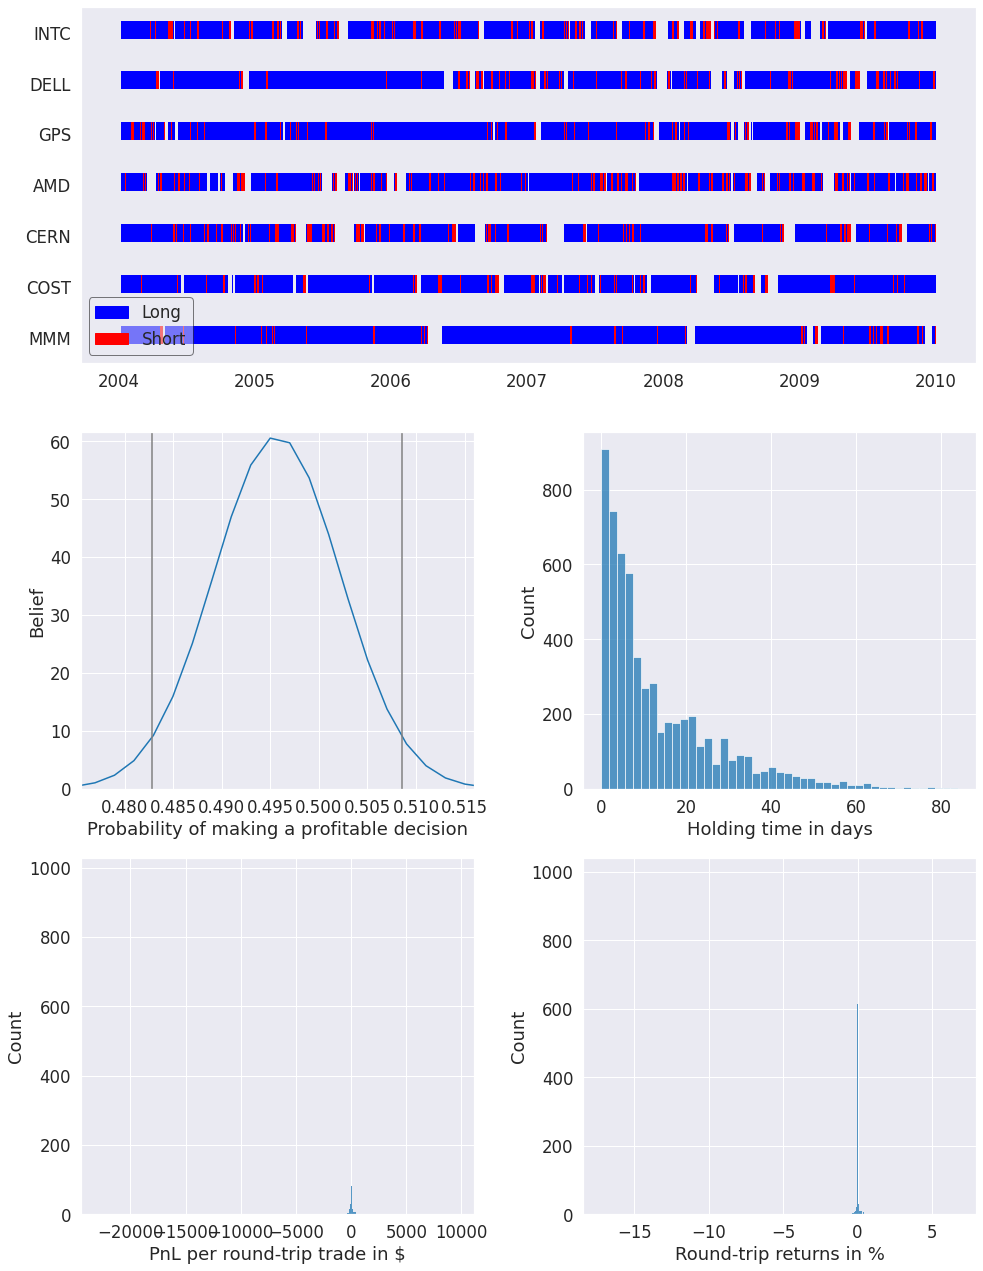

In [7]:
pf.create_round_trip_tear_sheet(returns, positions, transactions, sector_mappings=sect_map)